# Auswertung

# Latex Rendering + library import + file reading + primitive plot

In [1]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()


In [2]:
# load file

fname = "data_to_start/srtio3_bulk_STO_633nm_300cm-1_2p5mW_5x50s_100xlong.txt"
STO_2p5 = pd.read_csv(fname, sep="\t")

STO_2p5.wavenumber
STO_2p5.counts

0       26.105
1       29.490
2       34.875
3       40.325
4       43.825
         ...  
1019    34.285
1020    32.825
1021    30.375
1022    28.285
1023    26.410
Name: counts, Length: 1024, dtype: float64

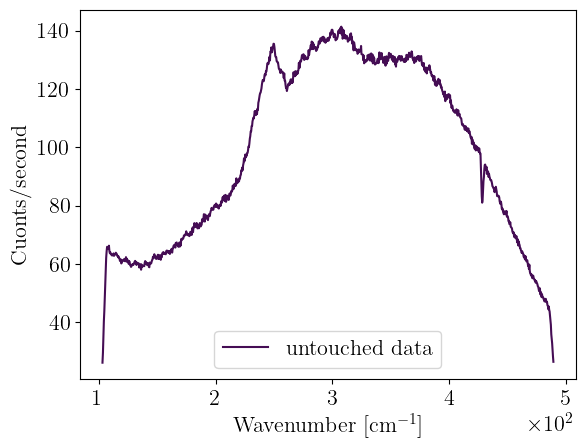

In [3]:
default_data = [
    [STO_2p5.wavenumber, STO_2p5.counts, "untouched data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]


# select x range e.g cut off edges

1024


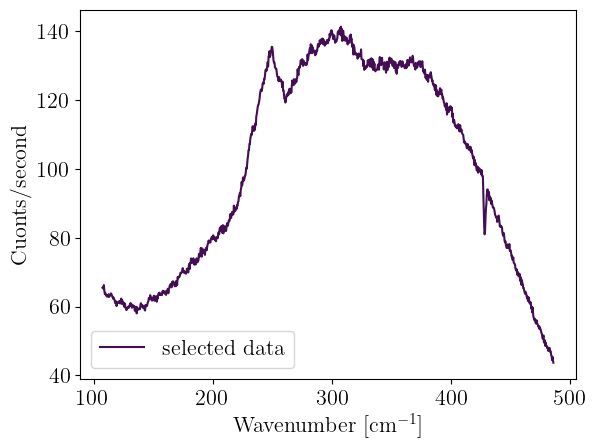

In [4]:
# cut of "from" "to"
von = 11
zu = 1015

print(len(STO_2p5.wavenumber))

cropped_default_data = [
    [STO_2p5.wavenumber[von:zu], STO_2p5.counts[von:zu], "selected data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(cropped_default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]


# get third point for arabola

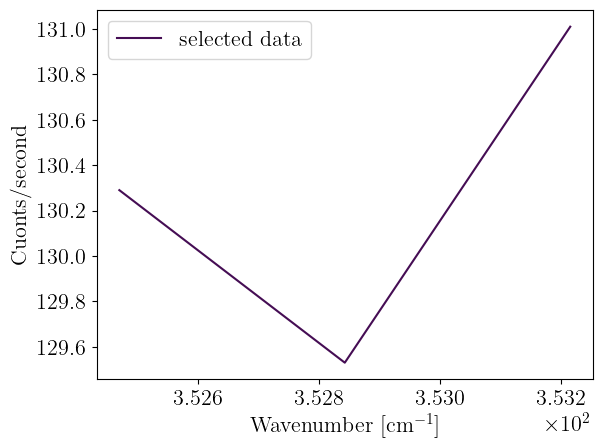

In [5]:
# cut of "from" "to"
vonnn = 650
zuuu = 653

cropped_default_data = [
    [STO_2p5.wavenumber[vonnn:zuuu], STO_2p5.counts[vonnn:zuuu], "selected data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(cropped_default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]

# STO_2p5.counts[651]
STO_2p5.wavenumber[651]

p2 = (581.152, 1.4225)



# get two points for linear baseline

(135.835, 59.885) (486.134, 42.075)
(135.835, 59.885) (486.134, 42.075)
1024


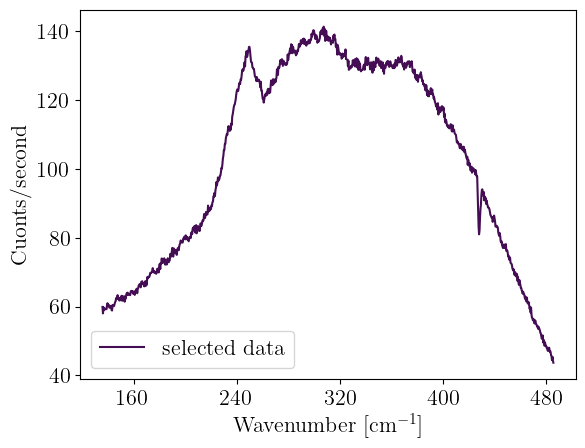

In [6]:
# cut of "from" "to"
vonnn = 83 # 83
zuuu = 1015

p1 = (135.835, 59.885) # 83
p2 = (486.134, 42.075) # 1015

print(p1, p2)

p1 = (STO_2p5.wavenumber[vonnn], STO_2p5.counts[vonnn])
p2 = (STO_2p5.wavenumber[zuuu], STO_2p5.counts[zuuu])

print(p1, p2)

print(len(STO_2p5.wavenumber))

cropped_default_data = [
    [STO_2p5.wavenumber[vonnn:zuuu], STO_2p5.counts[vonnn:zuuu], "selected data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(cropped_default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain") # [data_x, data_y, label, colorr, line_style, marker_type]

# baseline

In [7]:
linear = True
parabolic = False

In [8]:
# add linear baseline

def linear_f(x, m, c):
    return m*x + c

def get_linear_function(x1, y1, x2, y2):
    # Calculate the slope (m)
    m = (y2 - y1) / (x2 - x1)
    # Calculate the y-intercept (c) using y = mx + c
    c = y1 - m * x1
    return m, c  # Returns the linear function

# p1 = (135.835, 59.885) # 83
# p2 = (486.134, 42.075) # 1015



if linear:
    x1, y1, x2, y2 = STO_2p5.wavenumber[vonnn], STO_2p5.counts[vonnn], STO_2p5.wavenumber[zuuu], STO_2p5.counts[zuuu]

    m, c = get_linear_function(x1, y1, x2, y2)
    print(m, c)
    y_baseline = linear_f(STO_2p5.wavenumber, m, c)

    counts_baseline_adjusted = STO_2p5.counts - y_baseline




-0.05084228045184256 66.79116116517604


In [9]:
# add parabolic baseline
if parabolic:
    # identify smallest and biggest wavenumber

    mittlerer_punkt = 651

    p1 = (STO_2p5.wavenumber[von], STO_2p5.counts[von]) # (204.975, 2.2950)
    p2 = (STO_2p5.wavenumber[mittlerer_punkt], STO_2p5.counts[mittlerer_punkt]) # (581.152, 1.4225)
    p3 = (STO_2p5.wavenumber[zu], STO_2p5.counts[zu]) # (782.224, 1.3475)

    # in a numpy array:
    x_vals = np.array([STO_2p5.wavenumber[von], STO_2p5.wavenumber[mittlerer_punkt], STO_2p5.wavenumber[zu]])  # Wavenumbers
    y_vals = np.array([STO_2p5.counts[von], STO_2p5.counts[mittlerer_punkt], STO_2p5.counts[zu]])     # Counts


    def parabola(x,a,b,c):
        return a*x**2 + b*x + c

    # Fit the parabola to the given points
    popt, pcov = curve_fit(parabola, x_vals, y_vals)

    # popt contains the best-fit parameters [a, b, c]
    a_fit, b_fit, c_fit = popt


    # define for easier usage
    y_baseline = parabola(STO_2p5.wavenumber, a_fit, b_fit, c_fit)
    counts_baseline_adjusted = STO_2p5.counts - y_baseline

    counts_baseline_adjusted

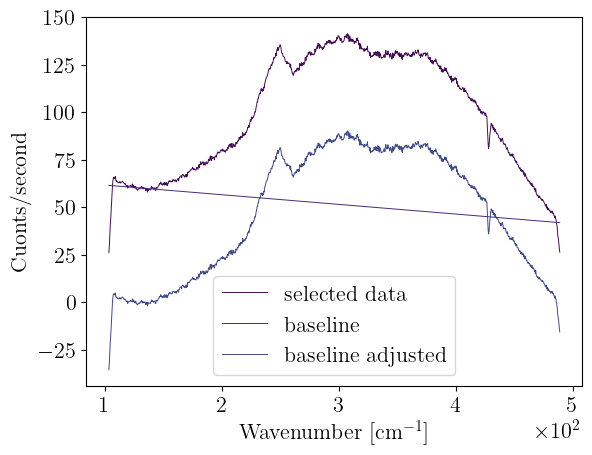

In [10]:
baseline_adjustments = [
    [STO_2p5.wavenumber, STO_2p5.counts, "selected data", c_scheme[0], "-", ""],
    [STO_2p5.wavenumber, y_baseline, "baseline", c_scheme[1], "-", ""],
    [STO_2p5.wavenumber, counts_baseline_adjusted, "baseline adjusted", c_scheme[2], "-", ""],
    # [array1, array2, "array1,2", c_scheme[3], "-", ""],

]

p_func.plot_with_one_axis(baseline_adjustments, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]



# try fit one lorentzian

In [11]:
# find selection for lorentzian fit

lorentzian_left = 520
lorentzian_right = 574

In [12]:
def lorentzian(x, A, x0, gamma):
    return A / (1 + ((x - x0) / gamma) ** 2)

# Provide initial guesses for [A, x0, gamma]
A_guess = max(counts_baseline_adjusted[lorentzian_left:lorentzian_right])
x0_guess = STO_2p5.wavenumber[lorentzian_left:lorentzian_right].iloc[np.argmax(counts_baseline_adjusted[lorentzian_left:lorentzian_right])]
gamma_guess = (max(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]) - min(STO_2p5.wavenumber[lorentzian_left:lorentzian_right])) / 100

p0 = [A_guess, x0_guess, gamma_guess] # Initial parameter guess
popt, pcov = curve_fit(lorentzian, STO_2p5.wavenumber[lorentzian_left:lorentzian_right], counts_baseline_adjusted[lorentzian_left:lorentzian_right], p0=p0) # Perform the curve fitting
A_fit, x0_fit, gamma_fit = popt # Extract best-fit parameters


# Generate smooth fitted curve
lorentzian_test_x_fit = np.linspace(min(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]), max(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]), 1000)
lorentzian_test_y_fit = lorentzian(lorentzian_test_x_fit, *popt)

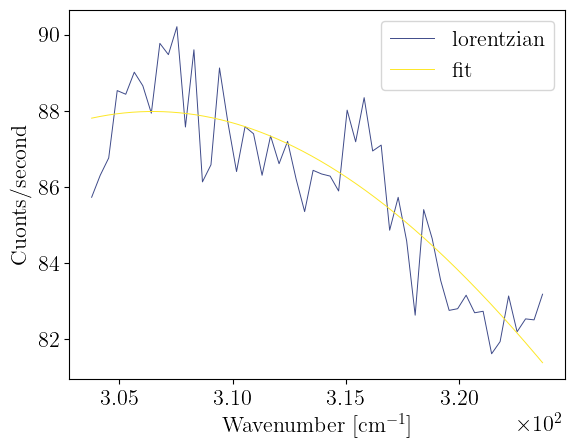

In [13]:
for_lorentzuan = [
    # [STO_2p5.wavenumber, counts_baseline_adjusted, "baseline adjusted", c_scheme[2], "-", ""],
    [STO_2p5.wavenumber[lorentzian_left:lorentzian_right], counts_baseline_adjusted[lorentzian_left:lorentzian_right], "lorentzian", c_scheme[2], "-", ""],
    [lorentzian_test_x_fit, lorentzian_test_y_fit, "fit", c_scheme[9], "-", ""],
]

p_func.plot_with_one_axis(for_lorentzuan, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]

# summary of the above

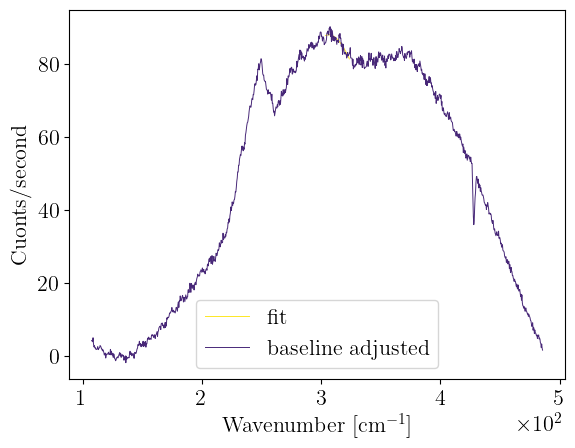

In [14]:
summary = [
    [lorentzian_test_x_fit, lorentzian_test_y_fit, "fit", c_scheme[9], "-", ""],
    [STO_2p5.wavenumber[von:zu], counts_baseline_adjusted[von:zu], "baseline adjusted", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis(summary, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]

# Try code from internet

[315.816, 88.34564447800308, 10, 299.63, 88.77271132660957, 10, 305.66, 89.01429027773415, 10, 309.425, 89.12571146363535, 10, 308.295, 89.60325968672477, 10, 307.543, 90.21002629182499, 10]
R-squared: 0.9917


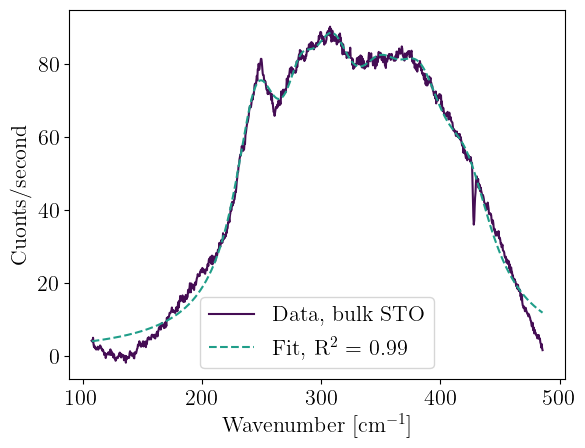

data_to_start/srtio3_bulk_STO_633nm_300cm-1_2p5mW_5x50s_100xlong.txt


In [22]:
import glob, os
import numpy as np
import csv
from matplotlib import pyplot
import scipy.signal
from scipy.optimize import curve_fit
import peakutils
from lmfit.models import PseudoVoigtModel
import math
import traceback
from collections import OrderedDict 

def lorentzian(x, amp, ctr, wid):
    return amp*wid**2/((x-ctr)**2+wid**2)

def func(x, *params):
    ''' *params of the form [center, amplitude, width ...] '''
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        # y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y = y + lorentzian(x, amp, ctr, wid)
    return y

def fit_lorentzians(guess, func, x, y):
    # Uses scipy curve_fit to optimise the lorentzian fitting
    sigma = [2] * len(y)
    popt, pcov = curve_fit(func, x, y, p0=guess, maxfev=5000000, sigma=sigma)
    # print('popt:', popt)
    fit = func(x, *popt)
    # pyplot.plot(x, y)
    # pyplot.plot(x, fit , 'r-')
    return (popt, fit)
    # pyplot.show()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# def find_peaks_scipy(xs, ys, widths=np.arange(1,50, 0.5)):
#     # Not perfect but seems to find the most obscure ones, I use this one
#     peaks = scipy.signal.find_peaks_cwt(ys, widths)#Problem
#     # pyplot.plot(xs[peaks], ys[peaks], marker='+', linestyle='', markersize='12')
#     # print('*************PEAKSCIPY**************')
#     # print('From scipy: \nPeak_pos= ', peaks, '\nPeaks= ', xs[peaks], '\nIntensities= ',ys[peaks])
#     # print('************************************')
#     return peaks 

def find_peaks_scipy(xs, ys, prominence=1):
    peaks, _ = scipy.signal.find_peaks(ys, prominence=prominence)
    return peaks

def get_highest_n_from_list(a, n):
    # Returns the highest peaks found by the peak finding algorithms
    return sorted(a, key=lambda pair: pair[1])[-n:]

def get_highest_n_peaks_scipy(xs, ys, n, th=0.25):
    smooth_indexes_scipy = find_peaks_scipy(xs, ys)
    ##take the highest 'n' smooth peaks 
    peak_indexes_xs_ys = np.asarray([list(a) for a in list(zip(xs[smooth_indexes_scipy], ys[smooth_indexes_scipy]))])
    return get_highest_n_from_list(peak_indexes_xs_ys, n)

def predict_and_plot_lorentzians(xs, ys, n_peaks_to_find=5):
    n_peaks = np.asarray(get_highest_n_peaks_scipy(xs, ys, n_peaks_to_find))

    # pyplot.plot(n_peaks[:,0], n_peaks[:,1], ls='', marker='x', markersize=10) ##This is plotting the peak positions, the xs
    # pyplot.ylabel("Counts")
    # pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")

    # print("n_peaks", n_peaks)
    guess = []

    for idx, xs_ys in enumerate(n_peaks):
        guess.append(xs_ys[0]) #ctr
        guess.append(xs_ys[1]) #amp
        guess.append(10) #width ###This could be improved by estimating the width first for a better fit
    # print('Fit Guess: ', guess)
    # guess.append(500); guess.append(0.25); guess.append(500) #Broad lorenztian

    print(guess)

    params, fit = fit_lorentzians(guess, func, xs, ys) ###params is the array of gaussian stuff, fit is the y's of lorentzians

    return (params, fit, ys, n_peaks)


def r_value(ys, ys_fit):
    # Calculate the residuals
    residuals = ys - ys_fit

    # Calculate the total sum of squares (SST)
    sst = np.sum((ys - np.mean(ys))**2)

    # Calculate the residual sum of squares (SSR)
    ssr = np.sum(residuals**2)

    # Calculate R-squared
    r_squared = 1 - (ssr / sst)

    print(f"R-squared: {r_squared:.4f}")


def linus_main_predict_fit(xs, ys):
    # pyplot.title("B" + " Raman Scattering - #" )

    params, fit, ys, n_peaks = predict_and_plot_lorentzians(xs,ys, 6) # 5 = number of peaks to fit to ##Returns modified ys for y axis scaling

    data_with_lorentzians = []

    data_with_lorentzians.append([xs, ys, "Data, bulk STO", c_scheme[0], "-", ""])
    data_with_lorentzians.append([xs, fit, r"Fit, R$^2$ = 0.99", c_scheme[5], "--", ""])

    for j in range(0, len(params), 3): 
        ctr = params[j] 
        amp = params[j+1]
        width = params[j+2]
        # pyplot.plot(xs, lorentzian(xs, amp, ctr, width), ls='-')

        # data_with_lorentzians.append([xs, lorentzian(xs, amp, ctr, width), "", c_scheme[3], "-", ""])

    return data_with_lorentzians, fit




if __name__ == "__main__":

    xs = np.asarray(STO_2p5.wavenumber[von:zu])
    ys = np.asarray(counts_baseline_adjusted[von:zu])


    ddd, f = linus_main_predict_fit(xs, ys)

    r_value(counts_baseline_adjusted[von:zu], f)


    p_func.plot_with_one_axis(ddd, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="Figures/results_srtio3_bulk", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain", line_width=1.5) # [data_x, data_y, label, colorr, line_style, marker_type] 

print(fname)